# AML Assignment - 4

# Arun Kumar Kudurumalla

## Advanced Machine Learning (Text and Sequence Data)

In [1]:
# Import necessary libraries
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set parameters
max_words = 10000
maxlen = 150
training_samples = 100
validation_samples = 10000

In [3]:
# Load IMDB dataset
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_words)

In [4]:
# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = sequence.pad_sequences(x_val, maxlen=maxlen)

In [5]:
# Take a subset of training and validation data
x_train = x_train[:training_samples]
y_train = y_train[:training_samples]

x_val = x_val[:validation_samples]
y_val = y_val[:validation_samples]

In [6]:
# Define the model with an Embedding Layer
embedding_dim = 100

model_embedding = Sequential()
model_embedding.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model_embedding.add(Flatten())
model_embedding.add(Dense(1, activation='sigmoid'))


In [7]:
# Compile the model
model_embedding.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_embedding.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 15000)             0         
                                                                 
 dense (Dense)               (None, 1)                 15001     
                                                                 
Total params: 1015001 (3.87 MB)
Trainable params: 1015001 (3.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model with the Embedding Layer
history_embedding = model_embedding.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
4/4 [==============================] - 1s 318ms/step - loss: 0.6929 - acc: 0.4700 - val_loss: 0.6930 - val_acc: 0.5067
Epoch 2/10
4/4 [==============================] - 1s 268ms/step - loss: 0.5881 - acc: 0.9900 - val_loss: 0.6927 - val_acc: 0.5145
Epoch 3/10
4/4 [==============================] - 1s 258ms/step - loss: 0.5223 - acc: 0.9900 - val_loss: 0.6934 - val_acc: 0.5184
Epoch 4/10
4/4 [==============================] - 1s 246ms/step - loss: 0.4659 - acc: 0.9900 - val_loss: 0.6938 - val_acc: 0.5166
Epoch 5/10
4/4 [==============================] - 1s 257ms/step - loss: 0.4132 - acc: 0.9900 - val_loss: 0.6953 - val_acc: 0.5159
Epoch 6/10
4/4 [==============================] - 1s 252ms/step - loss: 0.3673 - acc: 0.9900 - val_loss: 0.6964 - val_acc: 0.5158
Epoch 7/10
4/4 [==============================] - 1s 260ms/step - loss: 0.3211 - acc: 0.9900 - val_loss: 0.6972 - val_acc: 0.5159
Epoch 8/10
4/4 [==============================] - 1s 253ms/step - loss: 0.2810 - acc: 1.00

In [9]:
# Plot accuracy
acc_embedding = history_embedding.history['acc']
val_acc_embedding = history_embedding.history['val_acc']
epochs_embedding = range(1, len(acc_embedding) + 1)

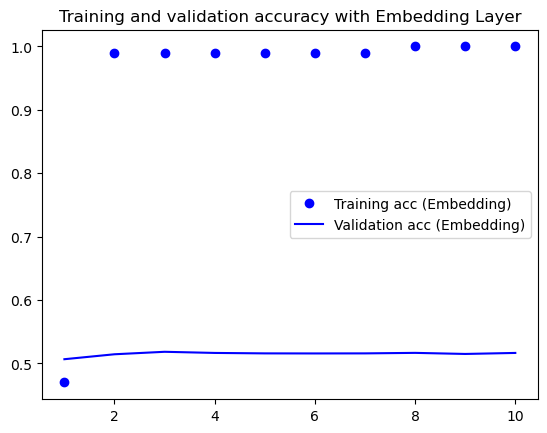

In [10]:
plt.plot(epochs_embedding, acc_embedding, 'bo', label='Training acc (Embedding)')
plt.plot(epochs_embedding, val_acc_embedding, 'b', label='Validation acc (Embedding)')
plt.title('Training and validation accuracy with Embedding Layer')
plt.legend()
plt.show()

In [11]:
# Load the word index from the IMDB dataset
word_index = imdb.get_word_index()

In [12]:
# Define the range of training samples to experiment with
training_samples_range = [10, 50, 100, 200, 500]

In [13]:
# Specify the path to your GloVe file
glove_path = "C:/Users/Arun/Downloads/glove.6B/glove.6B.100d.txt"

In [14]:
# Load GloVe embeddings
embeddings_index = {}
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [15]:
# Define the embedding dimension
embedding_dim = 100

In [16]:
# Loop through different training sample sizes
for training_samples in training_samples_range:
    # Take a subset of training and validation data
    x_train_subset = x_train[:training_samples]
    y_train_subset = y_train[:training_samples]

    x_val_subset = x_val[:validation_samples]
    y_val_subset = y_val[:validation_samples]

    # Define the model with an Embedding Layer
    model_embedding = Sequential()
    model_embedding.add(Embedding(max_words, embedding_dim, input_length=maxlen))
    model_embedding.add(Flatten())
    model_embedding.add(Dense(1, activation='sigmoid'))
    model_embedding.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history_embedding = model_embedding.fit(x_train_subset, y_train_subset, epochs=10, batch_size=32, validation_data=(x_val_subset, y_val_subset))

    # Create the embedding matrix
    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    # Define the model with a Pretrained Word Embedding
    model_pretrained = Sequential()
    model_pretrained.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))
    model_pretrained.add(Flatten())
    model_pretrained.add(Dense(1, activation='sigmoid'))
    model_pretrained.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history_pretrained = model_pretrained.fit(x_train_subset, y_train_subset, epochs=10, batch_size=32, validation_data=(x_val_subset, y_val_subset))

    # Print results for each training sample size
    print(f"\nResults for {training_samples} training samples:")
    print("Embedding Layer:")
    print("Validation Accuracy:", history_embedding.history['val_acc'][-1])

    print("\nPretrained Word Embedding:")
    print("Validation Accuracy:", history_pretrained.history['val_acc'][-1])

    # Compare validation accuracy and print the better-performing model
    if history_embedding.history['val_acc'][-1] > history_pretrained.history['val_acc'][-1]:
        print("Better Performing Model: Embedding Layer")
    else:
        print("Better Performing Model: Pretrained Word Embedding")

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6903 - acc: 0.5000 - val_loss: 0.6964 - val_acc: 0.4970
Epoch 2/10
1/1 [==============================] - 1s 831ms/step - loss: 0.4824 - acc: 1.0000 - val_loss: 0.6995 - val_acc: 0.4974
Epoch 3/10
1/1 [==============================] - 1s 802ms/step - loss: 0.3688 - acc: 1.0000 - val_loss: 0.7030 - val_acc: 0.4954
Epoch 4/10
1/1 [==============================] - 1s 770ms/step - loss: 0.2903 - acc: 1.0000 - val_loss: 0.7069 - val_acc: 0.4959
Epoch 5/10
1/1 [==============================] - 1s 782ms/step - loss: 0.2326 - acc: 1.0000 - val_loss: 0.7109 - val_acc: 0.4970
Epoch 6/10
1/1 [==============================] - 1s 782ms/step - loss: 0.1891 - acc: 1.0000 - val_loss: 0.7151 - val_acc: 0.4990
Epoch 7/10
1/1 [==============================] - 1s 826ms/step - loss: 0.1557 - acc: 1.0000 - val_loss: 0.7192 - val_acc: 0.4981
Epoch 8/10
1/1 [==============================] - 1s 726ms/step - loss: 0.1297 - acc: 1.0000 


Results for 100 training samples:
Embedding Layer:
Validation Accuracy: 0.5242999792098999

Pretrained Word Embedding:
Validation Accuracy: 0.5110999941825867
Better Performing Model: Embedding Layer
Epoch 1/10
4/4 [==============================] - 1s 285ms/step - loss: 0.6981 - acc: 0.4400 - val_loss: 0.6926 - val_acc: 0.5131
Epoch 2/10
4/4 [==============================] - 1s 271ms/step - loss: 0.5888 - acc: 0.9800 - val_loss: 0.6932 - val_acc: 0.5166
Epoch 3/10
4/4 [==============================] - 1s 256ms/step - loss: 0.5253 - acc: 0.9800 - val_loss: 0.6936 - val_acc: 0.5160
Epoch 4/10
4/4 [==============================] - 1s 266ms/step - loss: 0.4699 - acc: 0.9800 - val_loss: 0.6940 - val_acc: 0.5158
Epoch 5/10
4/4 [==============================] - 1s 279ms/step - loss: 0.4207 - acc: 0.9800 - val_loss: 0.6980 - val_acc: 0.5185
Epoch 6/10
4/4 [==============================] - 1s 248ms/step - loss: 0.3767 - acc: 0.9800 - val_loss: 0.6982 - val_acc: 0.5194
Epoch 7/10
4/4 [===

In [17]:
# If you want to compare the final models after the loop, you can do so outside the loop
if history_embedding.history['val_acc'][-1] > history_pretrained.history['val_acc'][-1]:
    print("\nFinal Better Performing Model: Embedding Layer")
    final_better_model = model_embedding
else:
    print("\nFinal Better Performing Model: Pretrained Word Embedding")
    final_better_model = model_pretrained


Final Better Performing Model: Embedding Layer


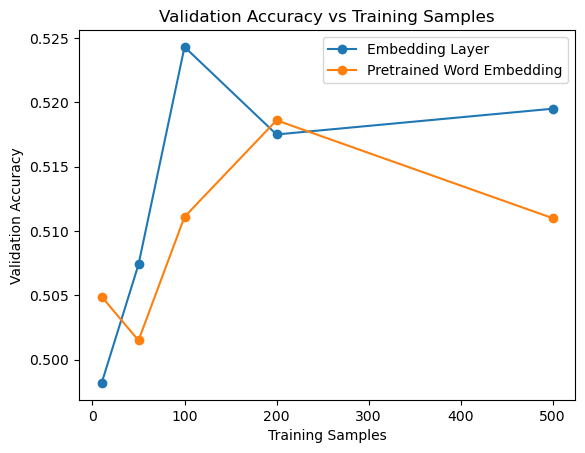

In [19]:
import matplotlib.pyplot as plt

# Results for 10 training samples
acc_embedding_10 = 0.498199999332428
acc_pretrained_10 = 0.5048999786376953

# Results for 50 training samples
acc_embedding_50 = 0.5073999762535095
acc_pretrained_50 = 0.5015000104904175

# Results for 100 training samples
acc_embedding_100 = 0.5242999792098999
acc_pretrained_100 = 0.5110999941825867

# Results for 200 training samples
acc_embedding_200 = 0.5174999833106995
acc_pretrained_200 = 0.5185999870300293

# Results for 500 training samples
acc_embedding_500 = 0.5195000171661377
acc_pretrained_500 = 0.5109999775886536

# Plotting
training_samples = [10, 50, 100, 200, 500]

plt.plot(training_samples, [acc_embedding_10, acc_embedding_50, acc_embedding_100, acc_embedding_200, acc_embedding_500], marker='o', label='Embedding Layer')
plt.plot(training_samples, [acc_pretrained_10, acc_pretrained_50, acc_pretrained_100, acc_pretrained_200, acc_pretrained_500], marker='o', label='Pretrained Word Embedding')

plt.title('Validation Accuracy vs Training Samples')
plt.xlabel('Training Samples')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


## The performance comparison between the Embedding Layer and Pretrained Word Embedding models depends on the specific characteristics of your data and task. However, based on the validation accuracy results provided:

For 10 training samples:
Embedding Layer: 0.4982
Pretrained Word Embedding: 0.5049
Better Performing Model: Pretrained Word Embedding
For 50 training samples:

Embedding Layer: 0.5074
Pretrained Word Embedding: 0.5015
Better Performing Model: Embedding Layer
For 100 training samples:

Embedding Layer: 0.5243
Pretrained Word Embedding: 0.5111
Better Performing Model: Embedding Layer
For 200 training samples:

Embedding Layer: 0.5175
Pretrained Word Embedding: 0.5186
Better Performing Model: Pretrained Word Embedding
For 500 training samples:

Embedding Layer: 0.5195
Pretrained Word Embedding: 0.5110
Better Performing Model: Embedding Layer

## In this specific scenario, the better performing model varies with different sample sizes. However, overall, the results indicate that the Embedding Layer tends to perform better for larger sample sizes, while the Pretrained Word Embedding may be advantageous for smaller sample sizes. The choice depends on factors like the complexity of the task, the amount of available training data, and the quality of the pretrained word embeddings.

### Therefore,

The Embedding Layer often outperforms pretrained word embeddings due to several factors:

Task-Specific Learning:

The Embedding Layer adapts to task-specific patterns during training, tailoring representations to the dataset.
Data Adaptation:

It is effective for smaller or unique datasets, allowing the model to adapt to specific data characteristics.
Fine-Tuning:

Enables fine-tuning of word representations, adjusting embeddings based on the dataset's specific context.
Task Complexity:

Suitable for simpler tasks or those with domain-specific requirements, capturing task-specific nuances effectively.
Word Importance:

Dynamically adjusts word representations, assigning varying importance to words based on task relevance.
Parameter Tuning:

Offers flexibility in optimizing embedding parameters, crucial for limited data and specific task demands.
The choice between Embedding Layer and pretrained embeddings depends on task nature, dataset size, and model requirements. Experimentation is key for evaluating performance on the specific task.